In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
ORIENTATION = {
    (1959, 1962): "droite",  # Charles de Gaulle's first term
    (1962, 1967): "droite",  # Charles de Gaulle's second term
    (1967, 1968): "droite",  # Charles de Gaulle's third term
    (1968, 1973): "droite",  # Georges Pompidou's first term
    (
        1973,
        1978,
    ): "droite",  # Georges Pompidou's second term and Valéry Giscard d'Estaing's first term
    (1978, 1981): "droite",  # Valéry Giscard d'Estaing's second term
    (1981, 1986): "gauche",  # François Mitterrand's first term
    (
        1986,
        1988,
    ): "droite",  # Cohabitation under François Mitterrand (Jacques Chirac as Prime Minister)
    (1988, 1993): "gauche",  # François Mitterrand's second term
    (
        1993,
        1997,
    ): "droite",  # Cohabitation under François Mitterrand (Édouard Balladur as Prime Minister)
    (
        1997,
        2002,
    ): "gauche",  # Cohabitation under Jacques Chirac (Lionel Jospin as Prime Minister)
    (2002, 2007): "droite",  # Jacques Chirac's second term
    (2007, 2012): "droite",  # Nicolas Sarkozy's term
    (2012, 2017): "gauche",  # François Hollande's term
    (2017, 2022): "droite",  # Emmanuel Macron's first term
    (2022, None): "droite",  # Emmanuel Macron's second term
}


def majorite(year):
    # Mapping of years to parliamentary majority orientation

    for period, orientation in ORIENTATION.items():
        start, end = period
        if end is None:
            if year >= start:
                return orientation
        else:
            if start <= year <= end:
                return orientation

    return "Year out of range"

In [9]:
df = pd.read_excel(
    "/Users/orwell/Library/CloudStorage/Dropbox/research/misc/france/data/La protection sociale en France de 1959 à 2023.xlsx",
    sheet_name="prestations_1959_2022",
).T
df.columns = df.iloc[0]
df.drop("Unnamed: 0", inplace=True)
df.index = pd.to_datetime([year[:4] for year in df.index], format="%Y")
df.columns.names = [""]
prestations = df[
    [
        "PRESTATIONS DE PROTECTION SOCIALE",
        "SANTÉ",
        "VIEILLESSE-SURVIE",
        "FAMILLE",
        "EMPLOI",
        "LOGEMENT",
        "PAUVRETÉ-EXCLUSION SOCIALE",
    ]
]
pct = prestations.pct_change()

/var/folders/ww/xvfsv3w53vdgv4m_09c5n2pc0000gn/T/ipykernel_51119/3995909477.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pct = prestations.pct_change()


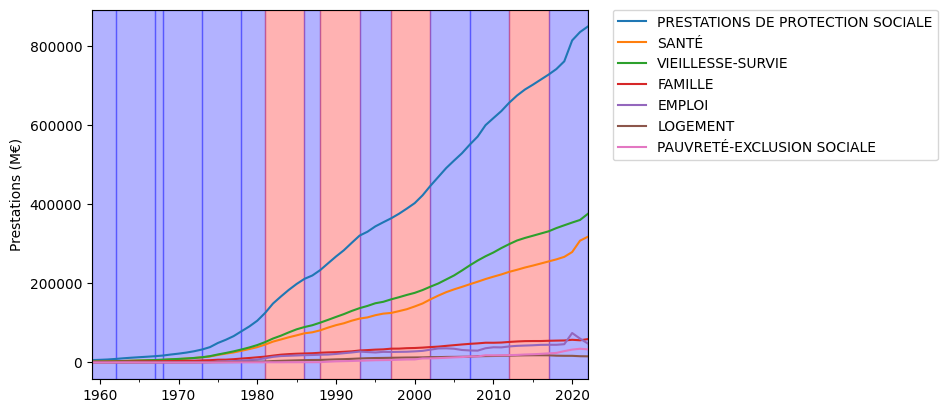

In [40]:
prestations.plot()
for period, orientation in ORIENTATION.items():
    try:
        start, end = period
        start_date = pd.to_datetime(f"{start}-01-01")
        end_date = (
            pd.to_datetime(f"{end}-01-01")
            if end is not None
            else pd.to_datetime("2024-01-01")
        )
        color = "blue" if orientation == "droite" else "red"
        plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    except Exception as e:
        print(f"Error processing period {period}: {e}")
        pass
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.ylabel("Prestations (M€)")
plt.show()

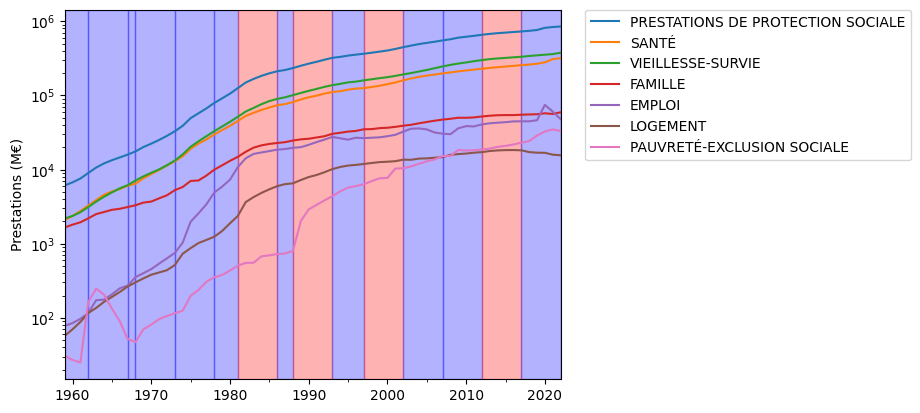

In [ ]:
prestations.plot()
for period, orientation in ORIENTATION.items():
    try:
        start, end = period
        start_date = pd.to_datetime(f"{start}-01-01")
        end_date = (
            pd.to_datetime(f"{end}-01-01")
            if end is not None
            else pd.to_datetime("2024-01-01")
        )
        color = "blue" if orientation == "droite" else "red"
        plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    except Exception as e:
        print(f"Error processing period {period}: {e}")
        pass
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.semilogy()
plt.ylabel("Prestations (M€)")
plt.show()

Text(0.5, 1.0, 'Depuis 2013')

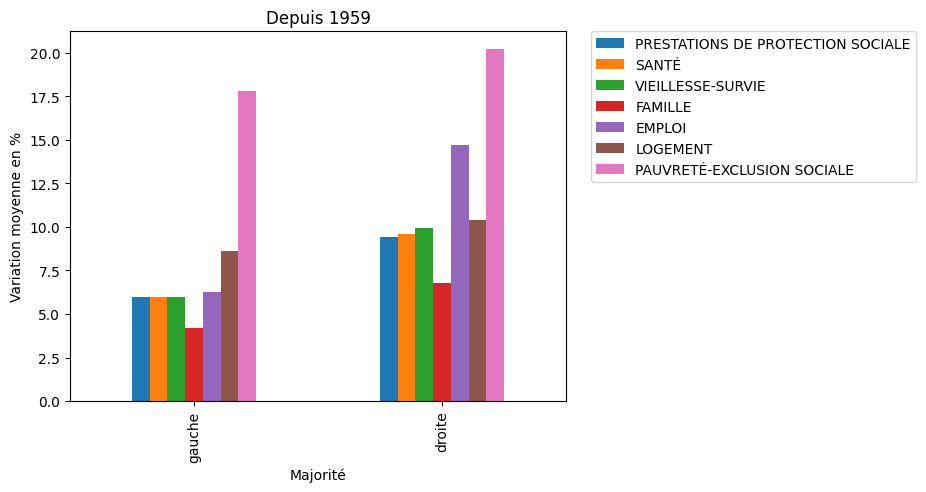

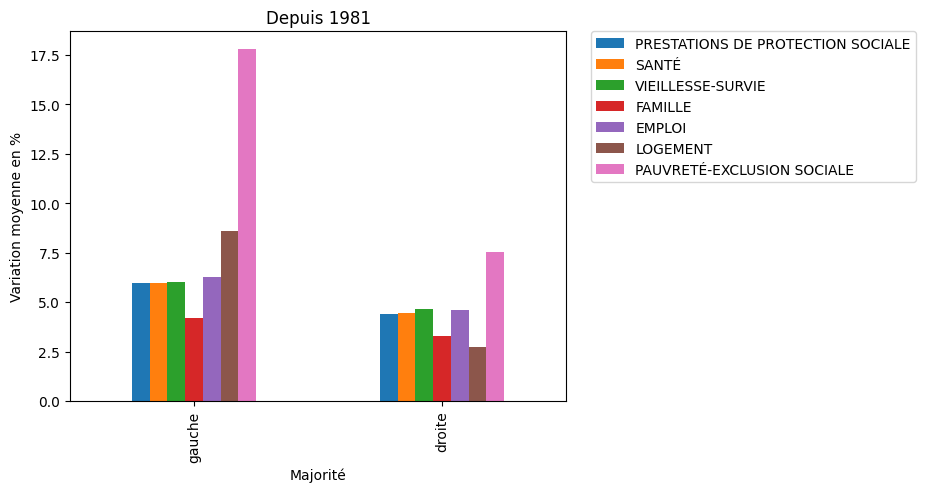

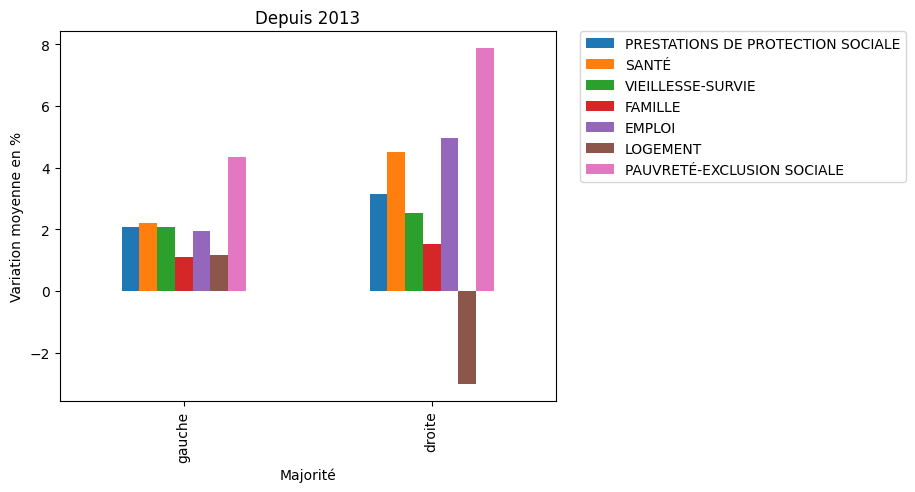

In [47]:
pct["Majorité"] = pct.index.year.map(majorite)
# %%

pct.loc["1959":].groupby("Majorité").mean().loc[["gauche", "droite"]].mul(
    100
).plot.bar()
plt.ylabel("Variation moyenne en %")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Depuis 1959")

pct.loc["1981":].groupby("Majorité").mean().loc[["gauche", "droite"]].mul(
    100
).plot.bar()
plt.ylabel("Variation moyenne en %")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Depuis 1981")

pct.loc["2013":].groupby("Majorité").mean().loc[["gauche", "droite"]].mul(
    100
).plot.bar()
plt.ylabel("Variation moyenne en %")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Depuis 2013")